## Hypothesis: Students that are majoring or minoring in computer science are more likely to say the course is valuable than others.

Autoload the code when saving changes. 

In [1]:
%reload_ext autoreload
%autoreload 2

First I will read the survey data and convert it to a column-oriented table.

In [1]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('/Users/yutik/comp110-21f-workspace/data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

Next, I will select just the relevant columns: comp_major and valuable. 

In [2]:
from data_utils import select, head
subset: dict[str, list[str]] = select(columns, ["comp_major", "valuable"])
head(subset, 5)

{'comp_major': ['No', 'No'], 'valuable': ['6', '7']}

Next I will count the amount of students that consider the class valuable (rating 4-7) and the students that consider the class not valuable (rating 1-3).

In [4]:
from data_utils import count
counts = count(subset['valuable'])
print(f"Count of students that find the class valuable: {counts['7'] + counts['6'] + counts['5'] + counts['4']}")
print(f"Count of students that did not find the class valuable: {counts['1'] + counts['2'] + counts['3']}")

Count of students that find the class valuable: 523
Count of students that did not find the class valuable: 50


Next I will count the amount of students that are not majoring/minoring in Computer Science, and those that are.

In [5]:
counts2 = count(subset['comp_major'])
majors_minors: int = counts2['Yes - BS'] + counts2['Yes - BA'] + counts2['Yes - Minor']
no_majors_minors: int = counts2['No']
print(f"Count of students that are majoring / minoring in Computer Science: {majors_minors}")
print(f"Count of students that are not majoring / minoring in Computer Science: {no_majors_minors}")

Count of students that are majoring / minoring in Computer Science: 169
Count of students that are not majoring / minoring in Computer Science: 404


Next I will convert the likert data (ratings 1-7) on how valuable a student finds the course to a numeric type.

In [6]:
for each in subset['valuable']:
    if each != "":
        each = int(each)
head(subset, 5)

{'comp_major': ['No', 'No'], 'valuable': ['6', '7']}

Next I will plot the two variables on a bar braph to determine their relationship. 

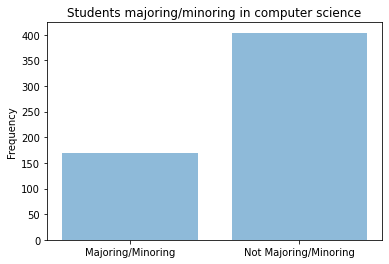

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

labels = ['Majoring/Minoring', 'Not Majoring/Minoring']
y_pos = [0, 1]
values = [majors_minors, no_majors_minors]

plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Frequency')
plt.title('Students majoring/minoring in computer science')

plt.show()

Create a list that only includes students that are majoring/minoring in computer science, and one that only includes students that are not majoring in computer science.

In [8]:
yes_subset: list[int] = []
no_subset: list[int] = []
i: int = 0
for item in subset['comp_major']:
    if item != 'No':
        yes_subset.append(int(subset['valuable'][i]))
    else:
        no_subset.append(int(subset['valuable'][i]))
    i += 1

Function to count the amount of times a rating appears in the yes_subset. 

In [9]:
def yesrating(comp_degree: list[int]) -> dict[int]:
    comp_counts = count(comp_degree)
    i = 1
    while i <= 7:
        if i not in comp_counts:
            comp_counts[i] = 0
        i += 1
    return comp_counts

Bar graph to depict the relationship between Majoring/Minoring in Computer Science and ratings on how valuable the class is.

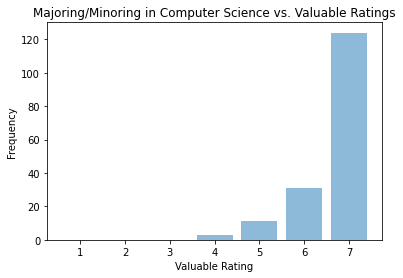

In [10]:
yes_labels = ['1', '2', '3', '4', '5', '6', '7']
yes_y_pos = [0, 1, 2, 3, 4, 5, 6]
counts_yes = yesrating(yes_subset)
yes_values = [counts_yes[1], counts_yes[2], counts_yes[3], counts_yes[4], counts_yes[5], counts_yes[6], counts_yes[7]]

plt.bar(yes_y_pos, yes_values, align='center', alpha=0.5)
plt.xticks(yes_y_pos, yes_labels)
plt.xlabel('Valuable Rating')
plt.ylabel('Frequency')
plt.title('Majoring/Minoring in Computer Science vs. Valuable Ratings')

plt.show()

Bar graph to depict the relationship between not Majoring/Minoring in Computer Science and ratings on how valuable the class is.

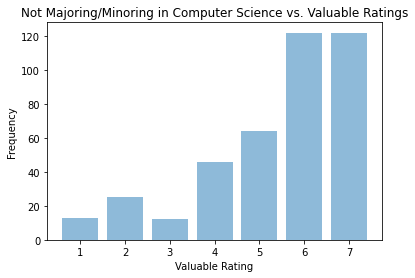

In [11]:
no_labels = ['1', '2', '3', '4', '5', '6', '7']
no_y_pos = [0, 1, 2, 3, 4, 5, 6]
counts_no = count(no_subset)
no_values = [counts_no[1], counts_no[2], counts_no[3], counts_no[4], counts_no[5], counts_no[6], counts_no[7]]

plt.bar(no_y_pos, no_values, align='center', alpha=0.5)
plt.xticks(no_y_pos, no_labels)
plt.xlabel('Valuable Rating')
plt.ylabel('Frequency')
plt.title('Not Majoring/Minoring in Computer Science vs. Valuable Ratings')

plt.show()

## Conclusion

No students majoring or minoring in Computer Science stated that COMP110 was not valuable, or gave a rating below 4 on the survey. However, about 50 students not majoring or minoring in Computer Science stated that COMP110 was not valuable. This might be because the students are more likely to be able to apply the material in the future and are more interested in the material. 